In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
config = {
    "input_file": "data/EMD_Reconstructed(i-80 0400-0415) 10042020.csv",
    "ground_truth_file": "data/true_camera6-0400-0415.csv",
    "input_position": "Local_Y",
    "input_speed": "v_Vel",
    "input_acc": "v_Acc"
}

In [3]:
df_input_data = pd.read_csv(config['input_file'])
df_ground_truth = pd.read_csv(config['ground_truth_file'])

In [4]:
#df_input_data

In [5]:
df = df_input_data.merge(df_ground_truth, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_input","_groud_truth"])
#df.loc[:, df.columns.str.contains("Ac")]
#df.loc[:, df.columns.str.contains("Local")].sample(10)
#df[(df.Local_Y_raw - df.Local_Y_new) > 30][["Local_Y_raw", "Local_Y_new"]]
#df

In [6]:
df[config["input_speed"] + "_input"].describe() #get stats for speed and acc

count    165826.000000
mean         26.031882
std          12.999750
min           0.000000
25%          18.295035
50%          24.738095
75%          30.861491
max          92.001731
Name: v_Vel_input, dtype: float64

<AxesSubplot:>

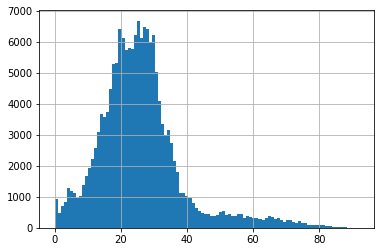

In [7]:
df[config["input_speed"] + "_input"].hist(bins=100)

In [8]:
df[config["input_acc"] + "_input"].describe() #get stats for speed and acc

count    165826.000000
mean          0.038542
std           1.889367
min         -11.200000
25%          -0.973328
50%           0.012048
75%           1.043674
max          11.200000
Name: v_Acc_input, dtype: float64

<AxesSubplot:>

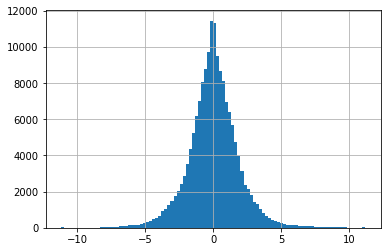

In [21]:
df[config["input_acc"] + "_input"].hist(bins=100)

In [10]:
# df.columns.str.contains("Length")
# Local_Y
# df.loc[:,df.columns.str.contains("Local_Y")]


,Local_Y_input,Local_Y_groud_truth
0,1256.239992,1244.45
1,1258.358435,1246.30
2,1260.494065,1248.17
3,1262.643210,1250.05
4,1264.803394,1251.95
...,...,...
165821,1496.329146,1475.75
165822,1498.940306,1478.58
165823,1501.471981,1481.43
165824,1503.922664,1484.30


In [11]:
# df.loc[:,df.columns.str.contains("v_Length")]


,v_Length_input,v_Length_groud_truth
0,14.3,0.0
1,14.3,0.0
2,14.3,0.0
3,14.3,0.0
4,14.3,0.0
...,...,...
165821,14.9,0.0
165822,14.9,0.0
165823,14.9,0.0
165824,14.9,0.0


In [12]:
class Comparison():
    
    def __init__(self, input_data, true_data, cfg):
        self.config = cfg
        self.input_data = input_data
        self.true_data = true_data
        #raw - input, new - groud_truth
        self.df = self.input_data.merge(self.true_data, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_input", "_groud_truth"])
        
    def MSE_speed(self):
        name = self.config['input_speed']
        self.df["Vel_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["Vel_diff"] ** 2) / self.df.shape[0]
    
    def MSE_acce(self):
        name = self.config['input_acc']
        self.df["Acc_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["Acc_diff"] ** 2)/self.df.shape[0]
    
    def MSE_loc(self):
        name = self.config['input_position']
        self.df["LocY_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"] - self.df['v_Length_input']
        return np.sum(self.df["LocY_diff"] ** 2)/self.df.shape[0]
    
    
        

In [13]:
c = Comparison(df_input_data, df_ground_truth, config)

In [14]:
c.MSE_acce()

2.446651147221717

In [15]:
c.MSE_speed()

3.2561927607149173

In [16]:
c.MSE_loc()

24.335762820860527

In [17]:
#np.sum((df["v_Vel_input"] - df["v_Vel_groud_truth"]) **2)/df.shape[0]
#np.sum((df["v_Acc_input"] - df["v_Acc_groud_truth"]) **2)/df.shape[0]
#df["v_Vel_input"] - df["v_Vel_groud_truth"]
#c.df["LocY_diff"].hist(bins=100)
#c.df[c.df["LocY_diff"] > 40]["Vehicle_ID"].unique()
#plt.plot(c.df[c.df["Vehicle_ID"] == 1483]["Local_Y_groud_truth"].tolist())
# plt.plot(c.df[c.df["Vehicle_ID"] == 1483]["Local_Y_groud_truth"].tolist())
# plt.plot(c.df[c.df["Vehicle_ID"] == 1483]["Local_Y_input"].tolist())

In [18]:
df["Vel_diff"] = df["v_Vel_input"] - df["v_Vel_groud_truth"]
df.groupby("Lane_ID_groud_truth").mean()["Vel_diff"]

Lane_ID_groud_truth
1.0    2.279408
2.0    0.426352
3.0    0.482828
4.0    0.283382
5.0    0.271189
6.0    0.371108
9.0    1.359397
Name: Vel_diff, dtype: float64

In [19]:
# ax = sns.kdeplot(data = df, x = df["Vel_diff"], hue = "Lane_ID_groud_truth")
# ax.set_xlim((-6,6))

In [20]:
df[df["Lane_ID_groud_truth"] != df["Lane_ID_input"]][["Lane_ID_groud_truth", "Lane_ID_input"]]

,Lane_ID_groud_truth,Lane_ID_input
592,5.0,4
593,5.0,4
594,5.0,4
595,5.0,4
596,5.0,4
...,...,...
164353,9.0,6
164354,9.0,6
164355,9.0,6
165232,3.0,2
